In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMRegressor

from sklearn.ensemble import RandomForestClassifier

In [2]:
# input
DATASET_PATH = 'course_project_train.csv'

# output
PREP_DATASET_PATH = 'course_project_train.csv'

**Описание датасета**

* **Home Ownership** - статус собственности
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Score** - кредитный рейтинг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [3]:
df = pd.read_csv(DATASET_PATH)
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [4]:
df.shape

(7500, 17)

In [5]:
df.iloc[0]


Home Ownership                            Own Home
Annual Income                               482087
Years in current job                           NaN
Tax Liens                                        0
Number of Open Accounts                         11
Years of Credit History                       26.3
Maximum Open Credit                         685960
Number of Credit Problems                        1
Months since last delinquent                   NaN
Bankruptcies                                     1
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                          1e+08
Current Credit Balance                       47386
Monthly Debt                                  7914
Credit Score                                   749
Credit Default                                   0
Name: 0, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

### Обзор данных<a class="anchor" id="review"></a>

**Обзор целевой переменной**

In [7]:
df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

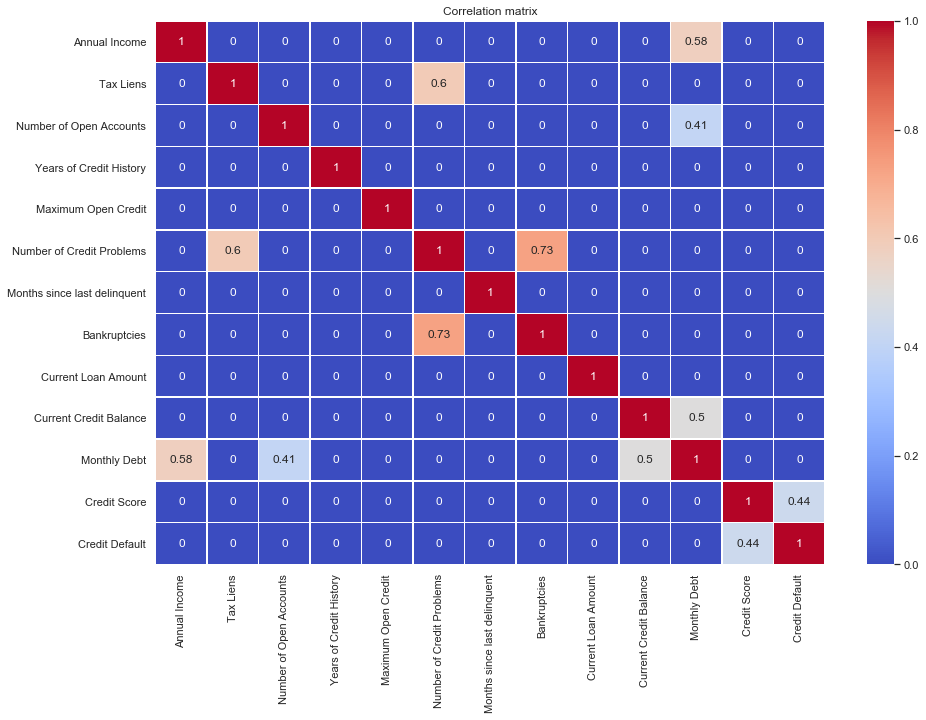

In [8]:
plt.figure(figsize = (15,10))
sns.set(font_scale=1)


corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.4] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [9]:
def correlation(
    df: pd.DataFrame, 
    target: str, 
    to_sort: str = None, 
    to_drop: str = None
) -> [print, plt.plot]:
    
    """calculates correlation whith target and plots graph"""
    
    corr_table = df.corr()
    
    result = corr_table.drop([to_drop], axis=0) if to_drop != None else corr_table
    sort_values = result.sort_values(to_sort, ascending=False)*100 if to_sort != None else result
    
    coef = round(sort_values[target], 2)
    
    print(coef)
    
    plt.figure(figsize=(12,4))

    plt.barh(coef.index, coef.values)

    plt.title(f'Correlation with {target}', fontsize=16)
    plt.xlabel('percent', fontsize=14)
    
    plt.grid()

Credit Score                    44.21
Number of Open Accounts          2.89
Tax Liens                        2.44
Number of Credit Problems        2.01
Monthly Debt                     1.85
Months since last delinquent     0.26
Bankruptcies                     0.16
Maximum Open Credit             -1.43
Current Credit Balance          -1.95
Years of Credit History         -2.06
Annual Income                  -10.14
Current Loan Amount            -22.65
Name: Credit Default, dtype: float64


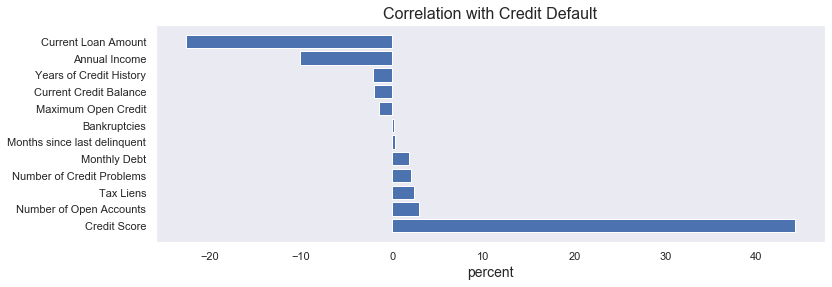

In [10]:
feauter = 'Credit Default'

correlation(df, target=feauter, to_drop=feauter, to_sort=feauter)

Как мы видим, большое значение корелляции только у Credit Score, а также у двух параметров большая отрицательная корелляция. 

**Обзор количественных признаков**

In [11]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [12]:
len(df) - df.count()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

Мы видим достаточно большое количество пропусков в графах 'Annual Income', 'Years in current job', 'Months since last delinquent', 'Credit Score'. Небольшое количество пропусков в 'Bankruptcies'.
Также при осмотре данных видны выбросы в 'Credit Score'. Начнем с них

In [13]:
df['Credit Score'].sort_values().unique()

array([ 585.,  586.,  588.,  589.,  590.,  591.,  593.,  594.,  597.,
        598.,  599.,  601.,  602.,  604.,  606.,  607.,  608.,  609.,
        610.,  611.,  612.,  613.,  614.,  615.,  616.,  617.,  618.,
        619.,  620.,  621.,  622.,  624.,  625.,  626.,  627.,  628.,
        629.,  630.,  631.,  632.,  633.,  634.,  635.,  636.,  637.,
        638.,  639.,  640.,  642.,  643.,  644.,  645.,  646.,  647.,
        648.,  649.,  650.,  651.,  652.,  653.,  654.,  655.,  656.,
        657.,  658.,  659.,  660.,  661.,  662.,  663.,  664.,  665.,
        666.,  667.,  668.,  669.,  670.,  671.,  672.,  673.,  674.,
        675.,  676.,  677.,  678.,  679.,  680.,  681.,  682.,  683.,
        684.,  685.,  686.,  687.,  688.,  689.,  690.,  691.,  692.,
        693.,  694.,  695.,  696.,  697.,  698.,  699.,  700.,  701.,
        702.,  703.,  704.,  705.,  706.,  707.,  708.,  709.,  710.,
        711.,  712.,  713.,  714.,  715.,  716.,  717.,  718.,  719.,
        720.,  721.,

In [14]:
df['Credit Score'].value_counts()

740.0     169
747.0     168
748.0     157
745.0     152
741.0     151
         ... 
602.0       1
616.0       1
585.0       1
620.0       1
7010.0      1
Name: Credit Score, Length: 268, dtype: int64

Т.к. большее количество показателей этого параметра трехзначные, значит четырехзначные являются умноженными на 10. В тренировочных данных выброс начинается после 751, но для ситуации корректных данных в тесте возьмем границу 800. Однако, заполнение этих значений путем деления на 10 сильно ухудшает корелляцию и общий результат модели. Поэтому, для данных значений возмем среднее. 

In [15]:
df[df['Number of Credit Problems'] == 0]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
5,Rent,NaN,7 years,0.0,12.0,14.6,366784.0,0.0,NaN,0.0,other,Long Term,337304.0,165680.0,18692.0,NaN,1
6,Home Mortgage,1511108.0,10+ years,0.0,9.0,20.3,388124.0,0.0,73.0,0.0,home improvements,Short Term,99999999.0,51623.0,2317.0,745.0,0
7,Rent,1040060.0,10+ years,0.0,13.0,12.0,330374.0,0.0,18.0,0.0,other,Short Term,250888.0,89015.0,19761.0,705.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.0,< 1 year,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1
7497,Rent,1878910.0,6 years,0.0,12.0,32.1,1778920.0,0.0,NaN,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0
7498,Home Mortgage,NaN,NaN,0.0,21.0,26.5,1141250.0,0.0,NaN,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,NaN,0


Выводы из этого и последущих моментов см. далее в функции FeatureImputer

In [16]:
df[df['Current Loan Amount'] == 99999999.0]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
6,Home Mortgage,1511108.0,10+ years,0.0,9.0,20.3,388124.0,0.0,73.0,0.0,home improvements,Short Term,99999999.0,51623.0,2317.0,745.0,0
22,Rent,463790.0,NaN,0.0,6.0,28.3,288442.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,157700.0,5063.0,738.0,0
27,Rent,1004055.0,8 years,0.0,7.0,14.5,328394.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,195966.0,6041.0,734.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,Rent,1406836.0,1 year,0.0,12.0,22.6,2383260.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,461054.0,7386.0,747.0,0
7445,Home Mortgage,1564384.0,6 years,0.0,21.0,17.3,1545016.0,0.0,NaN,0.0,other,Long Term,99999999.0,1043442.0,32461.0,728.0,0
7464,Home Mortgage,1159152.0,6 years,0.0,14.0,22.0,389356.0,1.0,77.0,1.0,debt consolidation,Short Term,99999999.0,49438.0,18257.0,737.0,0
7475,Rent,848426.0,10+ years,0.0,8.0,20.1,526306.0,0.0,12.0,0.0,debt consolidation,Short Term,99999999.0,83638.0,16473.0,742.0,0


In [17]:
df[df['Tax Liens'] == 0]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.0,< 1 year,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1
7497,Rent,1878910.0,6 years,0.0,12.0,32.1,1778920.0,0.0,NaN,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0
7498,Home Mortgage,NaN,NaN,0.0,21.0,26.5,1141250.0,0.0,NaN,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,NaN,0


In [18]:
df['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64

**Обзор номинативных признаков**

In [19]:
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

In [20]:
class FeatureImputer:
    """Заполнение пропусков и обработка выбросов"""
    
    def __init__(self):
        self.medians=None
        
    def fit(self, df):
        self.medians = df.median()
    
    def transform(self, df):
        #Обработка количественных признаков 
        
        #обработка Credit Score. Устранение выбросов, затем заполнение пропусков модой.
        #df.loc[df['Credit Score'] > 800, 'Credit Score'] = df['Credit Score'] / 10
        df['Credit Score'].fillna(df['Credit Score'].mode()[0], inplace=True)
        df.loc[df['Credit Score'] > 800, 'Credit Score'] = df['Credit Score'].mean()

        #Обработка Annual Income. Заполним средним
        df['Annual Income'].fillna(df['Annual Income'].mean(), inplace=True)

        #Обработка Months since last delinquent. В данных видно, что люди, у которых были проблемы с кредитом, 
        #порой имеют большое значение после последней просрочки. 
        #Поэтому для тех, у кого кредитных просрочек не было и нет обременения по налогам, сделаем отрицательное значение. 
        #Остальные пропуски заполним средним, т.к. отрицательных значений будет большинство - они станут и модой, и медианой. 
        df.loc[(df['Tax Liens'] == 0) & (df['Number of Credit Problems'] == 0) & (df['Months since last delinquent'].isna()), 'Months since last delinquent'] = -1
        df['Months since last delinquent'].fillna(df['Months since last delinquent'].mean(), inplace=True)

        
        #Обработка Bankruptcies. Если у человека не было проблем с кредитом, то ставим 0. 
        df.loc[(df['Number of Credit Problems'] == 0) & (df['Bankruptcies'].isna()), 'Bankruptcies'] = 0
        
        #У признака Current Loan Amount есть явные выбросы - значения 99999999.0. Используем медиану, т.к. именно этот выброс является модой.
        df.loc[df['Current Loan Amount'] == 99999999.0, 'Current Loan Amount'] = df['Current Loan Amount'].mean()

        
        #Обработка категориальных признаков
        
        #У 'Home Ownership' есть два похожих значения, одно из которых небольшое, объединим в одну группу - 'Home Mortgage' и 'Have Mortgage'.
        df.loc[df['Home Ownership'] == 'Have Mortgage', 'Home Ownership'] = 'Home Mortgage'
        
        #Переведем количество лет на данной работе в количественный признак. пропуски заполним модой
        df.loc[df['Years in current job'] == '< 1 year', 'Years in current job'] = 0
        df.loc[df['Years in current job'] == '1 year', 'Years in current job'] = 1
        df.loc[df['Years in current job'] == '2 years', 'Years in current job'] = 2  
        df.loc[df['Years in current job'] == '3 years', 'Years in current job'] = 3
        df.loc[df['Years in current job'] == '4 years', 'Years in current job'] = 4 
        df.loc[df['Years in current job'] == '5 years', 'Years in current job'] = 5
        df.loc[df['Years in current job'] == '6 years', 'Years in current job'] = 6
        df.loc[df['Years in current job'] == '7 years', 'Years in current job'] = 7 
        df.loc[df['Years in current job'] == '8 years', 'Years in current job'] = 8
        df.loc[df['Years in current job'] == '9 years', 'Years in current job'] = 9 
        df.loc[df['Years in current job'] == '10+ years', 'Years in current job'] = 10
        df['Years in current job'].fillna(df['Years in current job'].mode()[0], inplace=True)
        df['Years in current job'] = df['Years in current job'].astype(int)
        
        #У Purpose есть похожие параметры, объединим их в одни значения. параметры с небольшим количеством значений отнесем к Other
        df.loc[df['Purpose'] == 'buy house', 'Purpose'] = 'home improvements'
        df.loc[df['Purpose'] == 'moving', 'Purpose'] = 'home improvements'
        df.loc[df['Purpose'] == 'small business', 'Purpose'] = 'business loan'
        df.loc[df['Purpose'] == 'vacation', 'Purpose'] = 'take a trip'
        df.loc[df['Purpose'] == 'renewable energy', 'Purpose'] = 'other'
        df.loc[df['Purpose'] == 'educational expenses', 'Purpose'] = 'other'
        df.loc[df['Purpose'] == 'wedding', 'Purpose'] = 'other'

        
        # преобразовываем категориальные признаки в dummy признаки
        for cat_colname in df.select_dtypes(include='object').columns:
            df = pd.concat([df, pd.get_dummies(df[cat_colname], prefix=cat_colname)], axis=1)
        
        #Избавимся от категориальных признаков, которые преобразовали в dummy
        df = df.drop(['Home Ownership', 'Purpose', 'Term'], axis=1)
        
        #Генерация новых признаков
        df['Credit_burden'] = df['Annual Income']/12 - df['Monthly Debt']

                    
        return df

In [21]:
imputer = FeatureImputer()

imputer.fit(df)

df = imputer.transform(df)

In [22]:
df.head()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,...,Purpose_buy a car,Purpose_debt consolidation,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_other,Purpose_take a trip,Term_Long Term,Term_Short Term,Credit_burden
0,482087.0,10,0.0,11.0,26.3,685960.0,1.0,16.493263,1.0,1.187318e+07,...,0,1,0,0,0,0,0,0,1,32259.916667
1,1025487.0,10,0.0,15.0,15.3,1181730.0,0.0,-1.000000,0.0,2.649680e+05,...,0,1,0,0,0,0,0,1,0,67084.250000
2,751412.0,8,0.0,11.0,35.0,1182434.0,0.0,-1.000000,0.0,1.187318e+07,...,0,1,0,0,0,0,0,0,1,48966.666667
3,805068.0,6,0.0,8.0,22.5,147400.0,1.0,16.493263,1.0,1.213960e+05,...,0,1,0,0,0,0,0,0,1,55751.000000
4,776264.0,8,0.0,13.0,13.6,385836.0,1.0,16.493263,0.0,1.258400e+05,...,0,1,0,0,0,0,0,0,1,57508.666667


Credit Score                    32.51
Term_Long Term                  18.15
Home Ownership_Rent              6.01
Purpose_business loan            5.28
Number of Open Accounts          2.89
Tax Liens                        2.44
Number of Credit Problems        2.01
Monthly Debt                     1.85
Home Ownership_Own Home          1.03
Months since last delinquent     0.93
Purpose_other                    0.93
Years in current job             0.68
Purpose_medical bills            0.61
Bankruptcies                     0.16
Purpose_take a trip             -0.26
Purpose_buy a car               -0.80
Purpose_major purchase          -0.92
Purpose_home improvements       -1.21
Maximum Open Credit             -1.43
Purpose_debt consolidation      -1.51
Current Credit Balance          -1.95
Years of Credit History         -2.06
Home Ownership_Home Mortgage    -6.53
Annual Income                   -8.87
Credit_burden                  -10.07
Term_Short Term                -18.15
Current Loan

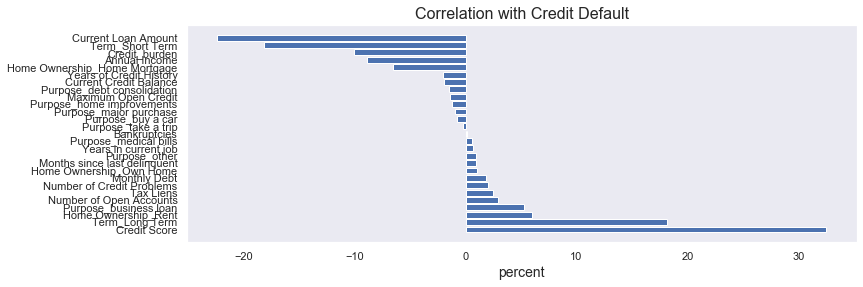

In [23]:
feauter = 'Credit Default'

correlation(df, target=feauter, to_drop=feauter, to_sort=feauter)

In [24]:
X = df.drop('Credit Default', axis=1)
y = df[['Credit Default']]